<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html linalg.do.txt  -->

# Linear Algebra, Handling of Arrays and more Python Features

## Introduction

The aim of this set of lectures is to review some central linear algebra algorithms that we will need in our 
data analysis part and in the construction of Machine Learning algorithms (ML). 
This will allow us to introduce some central programming features of high-level languages like Python and 
compiled languages like C++ and/or Fortran. 

As discussed in the introductory notes, these series of lectures focuses both on using
central Python packages like **tensorflow** and **scikit-learn** as well
as writing your own codes for some central ML algorithms. The
latter can be written in a language of your choice, be it Python, Julia, R,
Rust, C++, Fortran etc. In order to avoid confusion however, in these lectures we will limit our
attention to Python, C++ and Fortran.

## Important Matrix and vector handling packages

There are several central software packages for linear algebra and eigenvalue problems. Several of the more
popular ones have been wrapped into ofter software packages like those from the widely used text **Numerical Recipes**. The original source codes in many of the available packages are often taken from the widely used
software package LAPACK, which follows two other popular packages
developed in the 1970s, namely EISPACK and LINPACK.  We describe them shortly here.

  * LINPACK: package for linear equations and least square problems.

  * LAPACK:package for solving symmetric, unsymmetric and generalized eigenvalue problems. From LAPACK's website <http://www.netlib.org> it is possible to download for free all source codes from this library. Both C/C++ and Fortran versions are available.

  * BLAS (I, II and III): (Basic Linear Algebra Subprograms) are routines that provide standard building blocks for performing basic vector and matrix operations. Blas I is vector operations, II vector-matrix operations and III matrix-matrix operations. Highly parallelized and efficient codes, all available for download from <http://www.netlib.org>.

When dealing with matrices and vectors a central issue is memory
handling and allocation. If our code is written in Python the way we
declare these objects and the way they are handled, interpreted and
used by say a linear algebra library, requires codes that interface
our Python program with such libraries. For Python programmers,
**Numpy** is by now the standard Python package for numerical arrays in
Python as well as the source of functions which act on these
arrays. These functions span from eigenvalue solvers to functions that
compute the mean value, variance or the covariance matrix. If you are
not familiar with how arrays are handled in say Python or compiled
languages like C++ and Fortran, the sections in this chapter may be
useful. For C++ programmer, **Armadillo** is widely used library for
linear algebra and eigenvalue problems. In addition it offers a
convenient way to handle and organize arrays. We discuss this library
as well.   Before we proceed we believe  it may be convenient to repeat some basic features of 
 matrices and vectors.

## Basic Matrix Features

Matrix properties reminder

$$
\mathbf{A} =
      \begin{bmatrix} a_{11} & a_{12} & a_{13} & a_{14} \\
                                 a_{21} & a_{22} & a_{23} & a_{24} \\
                                   a_{31} & a_{32} & a_{33} & a_{34} \\
                                  a_{41} & a_{42} & a_{43} & a_{44}
             \end{bmatrix}\qquad
\mathbf{I} =
      \begin{bmatrix} 1 & 0 & 0 & 0 \\
                                 0 & 1 & 0 & 0 \\
                                 0 & 0 & 1 & 0 \\
                                 0 & 0 & 0 & 1
             \end{bmatrix}
$$

The inverse of a matrix is defined by

$$
\mathbf{A}^{-1} \cdot \mathbf{A} = I
$$

<table class="dotable" border="1">
<thead>
<tr><th align="center">              Relations               </th> <th align="center">      Name     </th> <th align="center">                            matrix elements                            </th> </tr>
</thead>
<tbody>
<tr><td align="center">   $A = A^{T}$                               </td> <td align="center">   symmetric          </td> <td align="center">   $a_{ij} = a_{ji}$                                                          </td> </tr>
<tr><td align="center">   $A = \left (A^{T} \right )^{-1}$          </td> <td align="center">   real orthogonal    </td> <td align="center">   $\sum_k a_{ik} a_{jk} = \sum_k a_{ki} a_{kj} = \delta_{ij}$                </td> </tr>
<tr><td align="center">   $A = A^{ * }$                             </td> <td align="center">   real matrix        </td> <td align="center">   $a_{ij} = a_{ij}^{ * }$                                                    </td> </tr>
<tr><td align="center">   $A = A^{\dagger}$                         </td> <td align="center">   hermitian          </td> <td align="center">   $a_{ij} = a_{ji}^{ * }$                                                    </td> </tr>
<tr><td align="center">   $A = \left (A^{\dagger} \right )^{-1}$    </td> <td align="center">   unitary            </td> <td align="center">   $\sum_k a_{ik} a_{jk}^{ * } = \sum_k a_{ki}^{ * } a_{kj} = \delta_{ij}$    </td> </tr>
</tbody>
</table>

### Some famous Matrices

  * Diagonal if $a_{ij}=0$ for $i\ne j$

  * Upper triangular if $a_{ij}=0$ for $i > j$

  * Lower triangular if $a_{ij}=0$ for $i < j$

  * Upper Hessenberg if $a_{ij}=0$ for $i > j+1$

  * Lower Hessenberg if $a_{ij}=0$ for $i < j+1$

  * Tridiagonal if $a_{ij}=0$ for $|i -j| > 1$

  * Lower banded with bandwidth $p$: $a_{ij}=0$ for $i > j+p$

  * Upper banded with bandwidth $p$: $a_{ij}=0$ for $i < j+p$

  * Banded, block upper triangular, block lower triangular....

Some Equivalent Statements. For an $N\times N$ matrix  $\mathbf{A}$ the following properties are all equivalent

  * If the inverse of $\mathbf{A}$ exists, $\mathbf{A}$ is nonsingular.

  * The equation $\mathbf{Ax}=0$ implies $\mathbf{x}=0$.

  * The rows of $\mathbf{A}$ form a basis of $R^N$.

  * The columns of $\mathbf{A}$ form a basis of $R^N$.

  * $\mathbf{A}$ is a product of elementary matrices.

  * $0$ is not eigenvalue of $\mathbf{A}$.

## Numpy and arrays
[Numpy](http://www.numpy.org/) provides an easy way to handle arrays in Python. The standard way to import this library is as

In [1]:
import numpy as np
n = 10
x = np.random.normal(size=n)
print(x)

[-0.08059005  0.26043697  0.54190252 -0.8321864   1.74960664  0.28855565
  1.03029311 -0.54136139  0.94583038  0.99378218]


Here we have defined a vector $x$ with $n=10$ elements with its values given by the Normal distribution $N(0,1)$.
Another alternative is to declare a vector as follows

In [2]:
import numpy as np
x = np.array([1, 2, 3])
print(x)

[1 2 3]


Here we have defined a vector with three elements, with $x_0=1$, $x_1=2$ and $x_2=3$. Note that both Python and C++
start numbering array elements from $0$ and on. This means that a vector with $n$ elements has a sequence of entities $x_0, x_1, x_2, \dots, x_{n-1}$. We could also let (recommended) Numpy to compute the logarithms of a specific array as

In [3]:
import numpy as np
x = np.log(np.array([4, 7, 8]))
print(x)

[1.38629436 1.94591015 2.07944154]


Here we have used Numpy's unary function $np.log$. This function is
highly tuned to compute array elements since the code is vectorized
and does not require looping. We normaly recommend that you use the
Numpy intrinsic functions instead of the corresponding **log** function
from Python's **math** module. The looping is done explicitely by the
**np.log** function. The alternative, and slower way to compute the
logarithms of a vector would be to write

In [4]:
import numpy as np
from math import log
x = np.array([4, 7, 8])
for i in range(0, len(x)):
    x[i] = log(x[i])
print(x)

[1 1 2]


We note that our code is much longer already and we need to import the **log** function from the **math** module. 
The attentive reader will also notice that the output is $[1, 1, 2]$. Python interprets automacally our numbers as integers (like the **automatic** keyword in C++). To change this we could define our array elements to be double precision numbers as

In [5]:
import numpy as np
x = np.log(np.array([4, 7, 8], dtype = np.float64))
print(x)

[1.38629436 1.94591015 2.07944154]


or simply write them as double precision numbers (Python uses 64 bits as default for floating point type variables), that is

In [6]:
import numpy as np
x = np.log(np.array([4.0, 7.0, 8.0]))
print(x)

[1.38629436 1.94591015 2.07944154]


To check the number of bytes (remember that one byte contains eight bits for double precision variables), you can use simple use the **itemsize** functionality (the array $x$ is actually an object which inherits the functionalities defined in Numpy) as

In [7]:
import numpy as np
x = np.log(np.array([4.0, 7.0, 8.0]))
print(x.itemsize)

8


Having defined vectors, we are now ready to try out matrices. We can define a $3 \times 3 $ real matrix $\hat{A}$
as (recall that we user lowercase letters for vectors and uppercase letters for matrices)

In [8]:
import numpy as np
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
print(A)

[[1.38629436 1.94591015 2.07944154]
 [1.09861229 2.30258509 2.39789527]
 [1.38629436 1.60943791 1.94591015]]


If we use the **shape** function we would get $(3, 3)$ as output, that is verifying that our matrix is a $3\times 3$ matrix. We can slice the matrix and print for example the first column (Python organized matrix elements in a row-major order, see below) as

In [9]:
import numpy as np
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
# print the first column, row-major order and elements start with 0
print(A[:,0])

[1.38629436 1.09861229 1.38629436]


We can continue this was by printing out other columns or rows. The example here prints out the second column

In [10]:
import numpy as np
A = np.log(np.array([ [4.0, 7.0, 8.0], [3.0, 10.0, 11.0], [4.0, 5.0, 7.0] ]))
# print the first column, row-major order and elements start with 0
print(A[1,:])

[1.09861229 2.30258509 2.39789527]


Numpy contains many other functionalities that allow us to slice, subdivide etc etc arrays. We strongly recommend that you look up the [Numpy website for more details](http://www.numpy.org/). Useful functions when defining a matrix are the **np.zeros** function which declares a matrix of a given dimension and sets all elements to zero

In [11]:
import numpy as np
n = 10
# define a matrix of dimension 10 x 10 and set all elements to zero
A = np.zeros( (n, n) )
print(A)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


or initializing all elements to

In [12]:
import numpy as np
n = 10
# define a matrix of dimension 10 x 10 and set all elements to one
A = np.ones( (n, n) )
print(A)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


or as unitarily distributed random numbers (see the material on random number generators in the statistics part)

In [13]:
import numpy as np
n = 10
# define a matrix of dimension 10 x 10 and set all elements to random numbers with x \in [0, 1]
A = np.random.rand(n, n)
print(A)

[[0.77235007 0.27529208 0.31199504 0.17293829 0.82162246 0.13378194
  0.90679215 0.39664124 0.3121824  0.13861839]
 [0.69473608 0.72612916 0.4570065  0.41275555 0.76067335 0.56239325
  0.33900003 0.83105136 0.14230327 0.04713857]
 [0.62377027 0.12392385 0.7500676  0.67969567 0.15971479 0.97072608
  0.00183119 0.95291169 0.59353543 0.03550103]
 [0.99152919 0.13537597 0.88366546 0.73118203 0.82120582 0.53939154
  0.01958776 0.59647764 0.17941609 0.34647125]
 [0.43263402 0.2754374  0.59137018 0.52019078 0.71121535 0.60648493
  0.94665557 0.66298436 0.22615136 0.29639686]
 [0.84424529 0.59603845 0.9219476  0.44909201 0.67715931 0.18908167
  0.76516101 0.38007856 0.83478186 0.75271427]
 [0.53862422 0.11323706 0.15316333 0.34540564 0.81994631 0.52292446
  0.26760957 0.02430273 0.03576146 0.67801091]
 [0.52928925 0.14990609 0.86292532 0.43014974 0.83844809 0.04560463
  0.84163178 0.80868063 0.8371938  0.39611129]
 [0.12607006 0.5113303  0.63901709 0.99976659 0.34756595 0.28622513
  0.89290901

As we will see throughout these lectures, there are several extremely useful functionalities in Numpy.
As an example, consider the discussion of the covariance matrix. Suppose we have defined three vectors
$\hat{x}, \hat{y}, \hat{z}$ with $n$ elements each. The covariance matrix is defined as

$$
\hat{\Sigma} = \begin{bmatrix} \sigma_{xx} & \sigma_{xy} & \sigma_{xz} \\
                              \sigma_{yx} & \sigma_{yy} & \sigma_{yz} \\
                              \sigma_{zx} & \sigma_{zy} & \sigma_{zz} 
             \end{bmatrix},
$$

where for example

$$
\sigma_{xy} =\frac{1}{n} \sum_{i=0}^{n-1}(x_i- \overline{x})(y_i- \overline{y}).
$$

The Numpy function **np.cov** calculates the covariance elements using the factor $1/(n-1)$ instead of $1/n$ since it assumes we do not have the exact mean values. For a more in-depth discussion of the covariance and covariance matrix and its meaning, we refer you to the lectures on statistics. 
The following simple function uses the **np.vstack** function which takes each vector of dimension $1\times n$ and produces a $ 3\times n$ matrix $\hat{W}$

$$
\hat{W} = \begin{bmatrix} x_0 & y_0 & z_0 \\
                          x_1 & y_1 & z_1 \\
                          x_2 & y_2 & z_2 \\
                          \dots & \dots & \dots \\
                          x_{n-2} & y_{n-2} & z_{n-2} \\
                          x_{n-1} & y_{n-1} & z_{n-1}
             \end{bmatrix},
$$

which in turn is converted into into the $3 times 3$ covariance matrix
$\hat{\Sigma}$ via the Numpy function **np.cov()**. In our review of
statistical functions and quantities we will discuss more about the
meaning of the covariance matrix. Here we note that we can calculate
the mean value of each set of samples $\hat{x}$ etc using the Numpy
function **np.mean(x)**. We can also extract the eigenvalues of the
covariance matrix through the **np.linalg.eig()** function.

In [14]:
# Importing various packages
import numpy as np

n = 100
x = np.random.normal(size=n)
print(np.mean(x))
y = 4+3*x+np.random.normal(size=n)
print(np.mean(y))
z = x**3+np.random.normal(size=n)
print(np.mean(z))
W = np.vstack((x, y, z))
Sigma = np.cov(W)
print(Sigma)
Eigvals, Eigvecs = np.linalg.eig(Sigma)
print(Eigvals)

-0.04071979724729911
4.064820972167253
-0.3254718508870977
[[0.88727586 2.57584621 2.19767225]
 [2.57584621 8.44132765 6.34964801]
 [2.19767225 6.34964801 9.99322469]]
[16.34233281  0.08212093  2.89737445]


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


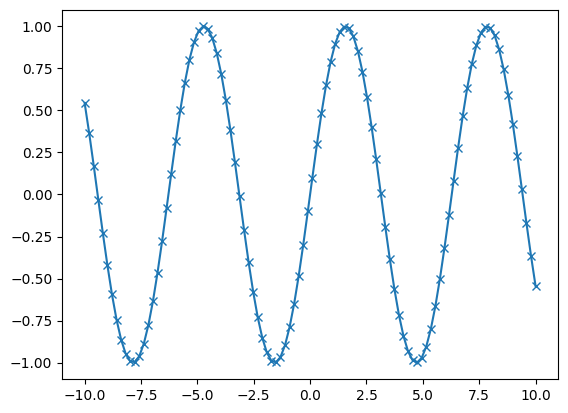

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
eye = np.eye(4)
print(eye)
sparse_mtx = sparse.csr_matrix(eye)
print(sparse_mtx)
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,marker='x')
plt.show()

## Other Matrix and Vector Operations

The following examples show how to compute various quantities like the **mean** value of a matrix or a vector and how to use functions like **reshape** and **ravel**. These are all useful quantities when scaling the data and preparing the data for various machine learning algorithms and when calculating quantities like the mean squared error or the variance.

In [16]:
"""
Simple code that tests various numpy functions
"""

import numpy as np
# Simple test-matrix of dim 3 x 4
a = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9],[10, 11, 12]],dtype=np.float64)
print(f"The test matrix:{a}")
# This is the total mean summed over all elements, which here has to be 6.5
print(f"This is the total mean summed over all elements:{np.mean(a,dtype=np.float64)}")
# This is the mean for each column, it returns an array with the mean values for each column. It returns a row-like vector
print(f"This is the mean for each column:{np.mean(a, axis=0, keepdims=True,dtype=np.float64)}")
# This is the mean value for each row, it returns an array via the keepdims option which is a column-like vector if
# keepdims=True. Else it return a row-like vector
# Try setting keepdims=False
print(f"This is the mean value for each row:{np.mean(a, axis=1, keepdims=True,dtype=np.float64)}")
# We print then the mean value for each row by  setting keepdims=False
print(f"This is the mean value for each row with keepdims false:{np.mean(a, axis=1, keepdims=False,dtype=np.float64)}")

The test matrix:[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
This is the total mean summed over all elements:6.5
This is the mean for each column:[[5.5 6.5 7.5]]
This is the mean value for each row:[[ 2.]
 [ 5.]
 [ 8.]
 [11.]]
This is the mean value for each row with keepdims false:[ 2.  5.  8. 11.]


Another useful function is the **ravel** function, which returns a flattened array as shown in the example here.

In [17]:
# Ravel return a contiguous flattened array.
print(f"Flatten  the matrix:{np.ravel(a)}")
# It is the same as reshaping the matrix into a one-dimensional array
print(f"Reshape the matrix to a one-dim array:{a.reshape(-1)}")
#  ‘C’ means to index the elements in row-major, C-style order, with the last axis index changing fastest, back to the first axis index changing slowest.
# ‘F’ means to index the elements in column-major, Fortran-style order, with the first index changing fastest, and the last index changing slowest 
print(np.ravel(a, order='F'))
# When order is ‘A’, it will preserve the array’s ‘C’ or ‘F’ ordering
# ‘A’ means to read the elements in Fortran-like index order if a is Fortran contiguous in memory, C-like order otherwise.
# ‘K’ means to read the elements in the order they occur in memory, except for reversing the data when strides are negative. By default, ‘C’ index order is used.
# Transposing it
print(np.ravel(a.T))
print(np.ravel(a.T, order='A'))

Flatten  the matrix:[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Reshape the matrix to a one-dim array:[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[ 1.  4.  7. 10.  2.  5.  8. 11.  3.  6.  9. 12.]
[ 1.  4.  7. 10.  2.  5.  8. 11.  3.  6.  9. 12.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


## Gaussian Elimination

We start with the linear set of equations

$$
\mathbf{A}\mathbf{x} = \mathbf{w}.
$$

We assume also that the matrix $\mathbf{A}$ is non-singular and that the
matrix elements along the diagonal satisfy $a_{ii} \ne 0$. Simple $4\times 4 $ example

$$
\begin{bmatrix}
                           a_{11}& a_{12} &a_{13}& a_{14}\\
                           a_{21}& a_{22} &a_{23}& a_{24}\\
                           a_{31}& a_{32} &a_{33}& a_{34}\\
                           a_{41}& a_{42} &a_{43}& a_{44}\\
                      \end{bmatrix} \begin{bmatrix}
                           x_1\\
                           x_2\\
                           x_3 \\
                           x_4  \\
                      \end{bmatrix}
  =\begin{bmatrix}
                           w_1\\
                           w_2\\
                           w_3 \\
                           w_4\\
                      \end{bmatrix}.
$$

or

$$
a_{11}x_1 +a_{12}x_2 +a_{13}x_3 + a_{14}x_4=w_1 \nonumber
$$

$$
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 + a_{24}x_4=w_2 \nonumber
$$

$$
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 + a_{34}x_4=w_3 \nonumber
$$

$$
a_{41}x_1 + a_{42}x_2 + a_{43}x_3 + a_{44}x_4=w_4. \nonumber
$$

The basic idea of Gaussian elimination is to use the first equation to eliminate the first unknown $x_1$
from the remaining $n-1$ equations. Then we use the new second equation to eliminate the second unknown
$x_2$ from the remaining $n-2$ equations. With $n-1$ such eliminations
we obtain a so-called upper triangular set of equations of the form

$$
b_{11}x_1 +b_{12}x_2 +b_{13}x_3 + b_{14}x_4=y_1 \nonumber
$$

$$
b_{22}x_2 + b_{23}x_3 + b_{24}x_4=y_2 \nonumber
$$

$$
b_{33}x_3 + b_{34}x_4=y_3 \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="eq:gaussbacksub"></div>

$$
b_{44}x_4=y_4. \nonumber
\label{eq:gaussbacksub} \tag{1}
$$

We can solve this system of equations recursively starting from $x_n$ (in our case $x_4$) and proceed with
what is called a backward substitution. 

This process can be expressed mathematically as

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
   x_m = \frac{1}{b_{mm}}\left(y_m-\sum_{k=m+1}^nb_{mk}x_k\right)\quad m=n-1,n-2,\dots,1.
\label{_auto1} \tag{2}
\end{equation}
$$

To arrive at such an upper triangular system of equations, we start by eliminating
the unknown $x_1$ for $j=2,n$. We achieve this by multiplying the first equation by $a_{j1}/a_{11}$ and then subtract
the result from the $j$th equation. We assume obviously that $a_{11}\ne 0$ and that
$\mathbf{A}$ is not singular.

Our actual $4\times 4$ example reads after the first operation

$$
\begin{bmatrix}
                           a_{11}& a_{12} &a_{13}& a_{14}\\
                           0& (a_{22}-\frac{a_{21}a_{12}}{a_{11}}) &(a_{23}-\frac{a_{21}a_{13}}{a_{11}}) & (a_{24}-\frac{a_{21}a_{14}}{a_{11}})\\
0& (a_{32}-\frac{a_{31}a_{12}}{a_{11}})& (a_{33}-\frac{a_{31}a_{13}}{a_{11}})& (a_{34}-\frac{a_{31}a_{14}}{a_{11}})\\
0&(a_{42}-\frac{a_{41}a_{12}}{a_{11}}) &(a_{43}-\frac{a_{41}a_{13}}{a_{11}}) & (a_{44}-\frac{a_{41}a_{14}}{a_{11}}) \\
                      \end{bmatrix} \begin{bmatrix}
                           x_1\\
                           x_2\\
                           x_3 \\
                           x_4  \\
                      \end{bmatrix} 
  =\begin{bmatrix}
                           y_1\\
                           w_2^{(2)}\\
                           w_3^{(2)} \\
                           w_4^{(2)}\\
                      \end{bmatrix},
$$

or

$$
b_{11}x_1 +b_{12}x_2 +b_{13}x_3 + b_{14}x_4=y_1 \nonumber
$$

$$
a^{(2)}_{22}x_2 + a^{(2)}_{23}x_3 + a^{(2)}_{24}x_4=w^{(2)}_2 \nonumber
$$

$$
a^{(2)}_{32}x_2 + a^{(2)}_{33}x_3 + a^{(2)}_{34}x_4=w^{(2)}_3 \nonumber
$$

$$
a^{(2)}_{42}x_2 + a^{(2)}_{43}x_3 + a^{(2)}_{44}x_4=w^{(2)}_4, \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
\label{_auto2} \tag{3}
\end{equation}
$$

The new coefficients are

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
   b_{1k} = a_{1k}^{(1)} \quad k=1,\dots,n,
\label{_auto3} \tag{4}
\end{equation}
$$

where each $a_{1k}^{(1)}$ is equal to the original $a_{1k}$ element. The other coefficients are

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
a_{jk}^{(2)} = a_{jk}^{(1)}-\frac{a_{j1}^{(1)}a_{1k}^{(1)}}{a_{11}^{(1)}} \quad j,k=2,\dots,n,
\label{_auto4} \tag{5}
\end{equation}
$$

with a new right-hand side given by

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
y_{1}=w_1^{(1)}, \quad w_j^{(2)} =w_j^{(1)}-\frac{a_{j1}^{(1)}w_1^{(1)}}{a_{11}^{(1)}} \quad j=2,\dots,n.
\label{_auto5} \tag{6}
\end{equation}
$$

We have also set $w_1^{(1)}=w_1$, the original vector element.
We see that the system of unknowns $x_1,\dots,x_n$ is transformed into an $(n-1)\times (n-1)$ problem.

This step is called forward substitution.
Proceeding with these substitutions, we obtain the
general expressions for the new coefficients

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
   a_{jk}^{(m+1)} = a_{jk}^{(m)}-\frac{a_{jm}^{(m)}a_{mk}^{(m)}}{a_{mm}^{(m)}} \quad j,k=m+1,\dots,n,
\label{_auto6} \tag{7}
\end{equation}
$$

with $m=1,\dots,n-1$ and a
right-hand side given by

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
   w_j^{(m+1)} =w_j^{(m)}-\frac{a_{jm}^{(m)}w_m^{(m)}}{a_{mm}^{(m)}}\quad j=m+1,\dots,n.
\label{_auto7} \tag{8}
\end{equation}
$$

This set of $n-1$ elimations leads us to an equations which is solved by back substitution.
If the arithmetics is exact and the matrix $\mathbf{A}$ is not singular, then the computed answer will be exact.

Even though the matrix elements along the diagonal are not zero,
numerically small numbers may appear and subsequent divisions may lead to large numbers, which, if added
to a small number may yield losses of precision. Suppose for example that our first division in $(a_{22}-a_{21}a_{12}/a_{11})$
results in $-10^{-7}$ and that $a_{22}$ is one.
one. We are then
adding $10^7+1$. With single precision this results in $10^7$.

  * Gaussian elimination, $O(2/3n^3)$ flops, general matrix

  * LU decomposition, upper triangular and lower tridiagonal matrices, $O(2/3n^3)$ flops, general matrix. Get easily the inverse, determinant and can solve linear equations with back-substitution only, $O(n^2)$ flops

  * Cholesky decomposition. Real symmetric or hermitian positive definite matrix, $O(1/3n^3)$ flops.

  * Tridiagonal linear systems, important for differential equations. Normally positive definite and non-singular. $O(8n)$ flops for symmetric. Special case of banded matrices.

  * Singular value decomposition

  * the QR method will be discussed in chapter 7 in connection with eigenvalue systems. $O(4/3n^3)$ flops.

The LU decomposition method means that we can rewrite
this matrix as the product of two matrices $\mathbf{L}$ and $\mathbf{U}$
where

$$
\begin{bmatrix}
                          a_{11} & a_{12} & a_{13} & a_{14} \\
                          a_{21} & a_{22} & a_{23} & a_{24} \\
                          a_{31} & a_{32} & a_{33} & a_{34} \\
                          a_{41} & a_{42} & a_{43} & a_{44}
                      \end{bmatrix}
                      = \begin{bmatrix}
                              1  & 0      & 0      & 0 \\
                          l_{21} & 1      & 0      & 0 \\
                          l_{31} & l_{32} & 1      & 0 \\
                          l_{41} & l_{42} & l_{43} & 1
                      \end{bmatrix}
                        \begin{bmatrix}
                          u_{11} & u_{12} & u_{13} & u_{14} \\
                               0 & u_{22} & u_{23} & u_{24} \\
                               0 & 0      & u_{33} & u_{34} \\
                               0 & 0      &  0     & u_{44}
             \end{bmatrix}.
$$

LU decomposition forms the backbone of other algorithms in linear algebra, such as the
solution of linear equations given by

$$
a_{11}x_1 +a_{12}x_2 +a_{13}x_3 + a_{14}x_4=w_1 \nonumber
$$

$$
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 + a_{24}x_4=w_2 \nonumber
$$

$$
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 + a_{34}x_4=w_3 \nonumber
$$

$$
a_{41}x_1 + a_{42}x_2 + a_{43}x_3 + a_{44}x_4=w_4.  \nonumber
$$

The above set of equations is conveniently solved by using LU decomposition as an intermediate step.

The matrix $\mathbf{A}\in \mathbb{R}^{n\times n}$ has an LU factorization if the determinant
is different from zero. If the LU factorization exists and $\mathbf{A}$ is non-singular, then the LU factorization
is unique and the determinant is given by

$$
det\{\mathbf{A}\}=det\{\mathbf{LU}\}= det\{\mathbf{L}\}det\{\mathbf{U}\}=u_{11}u_{22}\dots u_{nn}.
$$

There are at least three main advantages with LU decomposition compared with standard Gaussian elimination:

  * It is straightforward to compute the determinant of a matrix

  * If we have to solve sets of linear equations with the same matrix but with different vectors $\mathbf{y}$, the number of FLOPS is of the order $n^3$.

  * The inverse is such an operation 

With the LU decomposition it is rather
simple to solve a system of linear equations

$$
a_{11}x_1 +a_{12}x_2 +a_{13}x_3 + a_{14}x_4=w_1 \nonumber
$$

$$
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 + a_{24}x_4=w_2 \nonumber
$$

$$
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 + a_{34}x_4=w_3 \nonumber
$$

$$
a_{41}x_1 + a_{42}x_2 + a_{43}x_3 + a_{44}x_4=w_4. \nonumber
$$

This can be written in matrix form as

$$
\mathbf{Ax}=\mathbf{w}.
$$

where $\mathbf{A}$ and $\mathbf{w}$ are known and we have to solve for
$\mathbf{x}$. Using the LU dcomposition we write

$$
\mathbf{A} \mathbf{x} \equiv \mathbf{L} \mathbf{U} \mathbf{x} =\mathbf{w}.
$$

The previous equation can be calculated in two steps

$$
\mathbf{L} \mathbf{y} = \mathbf{w};\qquad \mathbf{Ux}=\mathbf{y}.
$$

To show that this is correct we use to the LU decomposition
to rewrite our system of linear equations as

$$
\mathbf{LUx}=\mathbf{w},
$$

and since the determinant of $\mathbf{L}$ is equal to 1 (by construction
since the diagonals of $\mathbf{L}$ equal 1) we can use the inverse of
$\mathbf{L}$ to obtain

$$
\mathbf{Ux}=\mathbf{L^{-1}w}=\mathbf{y},
$$

which yields the intermediate step

$$
\mathbf{L^{-1}w}=\mathbf{y}
$$

and as soon as we have $\mathbf{y}$ we can obtain $\mathbf{x}$
through $\mathbf{Ux}=\mathbf{y}$.

For our four-dimentional example this takes the form

$$
y_1=w_1 \nonumber
$$

$$
l_{21}y_1 + y_2=w_2\nonumber
$$

$$
l_{31}y_1 + l_{32}y_2 + y_3 =w_3\nonumber
$$

$$
l_{41}y_1 + l_{42}y_2 + l_{43}y_3 + y_4=w_4. \nonumber
$$

and

$$
u_{11}x_1 +u_{12}x_2 +u_{13}x_3 + u_{14}x_4=y_1 \nonumber
$$

$$
u_{22}x_2 + u_{23}x_3 + u_{24}x_4=y_2\nonumber
$$

$$
u_{33}x_3 + u_{34}x_4=y_3\nonumber
$$

$$
u_{44}x_4=y_4  \nonumber
$$

This example shows the basis for the algorithm
needed to solve the set of $n$ linear equations.

The algorithm goes as follows

  * Set up the matrix $\bf A$ and the vector $\bf w$ with their correct dimensions. This determines the dimensionality of the unknown vector $\bf x$.

  * Then LU decompose the matrix $\bf A$ through a call to the function `ludcmp(double a, int n, int indx, double &d)`. This functions returns the LU decomposed matrix $\bf A$, its determinant and the vector indx which keeps track of the number of interchanges of rows. If the determinant is zero, the solution is malconditioned.

  * Thereafter you call the function  `lubksb(double a, int n, int indx, double w)` which uses the LU decomposed matrix $\bf A$ and the vector $\bf w$ and returns $\bf x$ in the same place as $\bf w$. Upon exit the original content in $\bf w$ is destroyed. If you wish to keep this information, you should make a backup of it in your calling function.

### LU Decomposition, the inverse of a matrix

If the inverse exists then

$$
\mathbf{A}^{-1}\mathbf{A}=\mathbf{I},
$$

the identity matrix. With an LU decomposed matrix we can rewrite the last equation as

$$
\mathbf{LU}\mathbf{A}^{-1}=\mathbf{I}.
$$

If we assume that the first column (that is column 1) of the inverse matrix
can be written as a vector with unknown entries

$$
\mathbf{A}_1^{-1}= \begin{bmatrix}
                              a_{11}^{-1} \\
                              a_{21}^{-1} \\
                              \dots \\
                              a_{n1}^{-1} \\
                    \end{bmatrix},
$$

then we have a linear set of equations

$$
\mathbf{LU}\begin{bmatrix}
                              a_{11}^{-1} \\
                              a_{21}^{-1} \\
                              \dots \\
                              a_{n1}^{-1} \\
                    \end{bmatrix} =\begin{bmatrix}
                               1 \\
                              0 \\
                              \dots \\
                              0 \\
                    \end{bmatrix}.
$$

In a similar way we can compute the unknow entries of the second column,

$$
\mathbf{LU}\begin{bmatrix}
                              a_{12}^{-1} \\
                              a_{22}^{-1} \\
                              \dots \\
                              a_{n2}^{-1} \\
                    \end{bmatrix}=\begin{bmatrix}
                                0 \\
                              1 \\
                              \dots \\
                              0 \\
                    \end{bmatrix},
$$

and continue till we have solved all $n$ sets of linear equations.

The calculation of the inverse here assumes that it actually
exists. In many machine learning applications there may be strong
linear dependencies among the various columns and/or rows. In our
discussions of linear regression we will dive into the mathematics of
the singular value decomposition, an algorithm which will allow us to calculate the so-called pseudo-inverse.
These details will be presented in our linear regression chapter.